#Judul :
#**Prediksi Pasien Berpotensi Terkena Stroke**

#Topik :

Final project ini bertujuan untuk mengembangkan model  yang memperkirakan kemungkinan seseorang mengalami stroke berdasarkan beberapa faktor resiko penyebab stroke.

#Gambaran Masalah:

Stroke merupakan salah satu penyakit serius yang dapat menyebabkan cacat dan kematian. Identifikasi faktor-faktor risiko yang dapat memprediksi kemungkinan seseorang terkena stroke dapat membantu dalam pencegahan kondisi ini, dengan harapan dapat menghasilkan model yang akurat untuk membantu dalam penanganan dan pencegahan stroke.

#Tentang Dataset

Link dataset : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset#

Dataset yang digunakan terdiri dari 5110 baris dan 12 kolom, dimana setiap kolom berisi informasi sebagai berikut :
1. id : Ini adalah identifikasi unik untuk setiap entri dalam dataset. Setiap baris data memiliki ID yang berbeda, yang memungkinkan untuk mengidentifikasi setiap pasien secara unik.

2. gender : variabel ini mencatat jenis kelamin pasien, yang dapat berupa "Male" (laki-laki), "Female" (perempuan), atau "Other" (lainnya).

3. age : variabel ini menunjukkan usia pasien dalam tahun.

4. hypertension : variabel yang menunjukkan apakah pasien memiliki riwayat hipertensi (tekanan darah tinggi) atau tidak. Jika pasien memiliki hipertensi, nilainya adalah 1, sedangkan jika tidak, nilainya adalah 0.

5. heart_disease : variabel yang menunjukkan apakah pasien memiliki riwayat penyakit jantung atau tidak. Jika pasien memiliki penyakit jantung, nilainya adalah 1, sedangkan jika tidak, nilainya adalah 0.

6. ever_married : variabel ini menunjukkan apakah pasien pernah menikah atau tidak. Jika pasien pernah menikah nilainya adalah "Yes" dan jika pasien belum pernah menikah nilainya adalah "No".

7. work_type : veriabel yang menunjukkan jenis pekerjaan, nilai-nilai nya adalah "children" (anak-anak), "Govt_job" (pekerjaan pemerintah), "Never_worked" (belum pernah bekerja), "Private" (pekerjaan swasta), atau "Self-employed" (usaha sendiri).

8. Residence_type : variabel ini menunjukkan tipe tempat tinggal pasien, nilainya adalah "Rural" (pedesaan) atau "Urban" (perkotaan).

9. avg_glucose_level : variable ini menunjukkan rata-rata tingkat glukosa dalam darah pasien. Diukur dalam satuan tertentu, seperti milimol per liter (mmol/L) atau miligram per desiliter (mg/dL).

10. bmi : variable ini menunjukkan Indeks Massa Tubuh (BMI) pasien, yang mengukur proporsi berat badan terhadap tinggi badan. Diukur dalam satuan kilogram per meter persegi (kg/m^2).

11. smoking_status : variable ini menunjukkan status merokok pasien, nilainya adalah “formerly smoked”, “never smoked”, “smokes”, "Unknown".

12. stroke : variabel target yang menunjukkan apakah pasien pernah mengalami stroke (1) atau tidak (0).









#Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Obsevasi :
Data terdiri dari 5110 baris dan 12 kolom


#Praprocessing Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Observasi:
1. Dataset teridiri dari 7 data numericals dan 5 data categoricals.
2. Semua dataset sudah sesuai tipe datanya.
3. Ada missing value pada kolom bmi.

In [ ]:
# Pengelompokkan kolom data categoricals dan data numericals

categoricals = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

numericals = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [ ]:
data[categoricals].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
data[numericals].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Cek missing value
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Ada missing value pada column bmi sebanyak 201.

In [ ]:
#Cek persentase missing value
data.isna().sum() * 100 / len(data)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

Missing value sebanyak 3.93 % dari total data

Deteksi Outliers

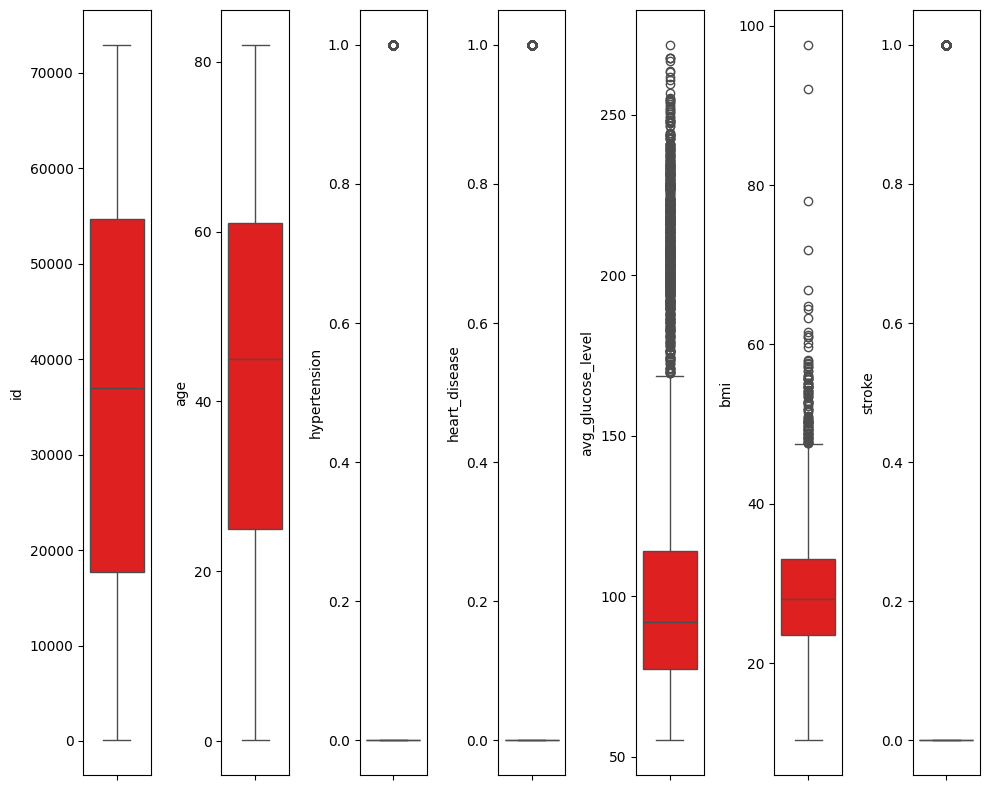

In [ ]:
# plotting
plt.figure(figsize=(10,8))
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

Dari visualisasi boxplot diatas terlihat :
- Kolom id dan age tidak terdeteksi outliers.
- Kolom hypertension, heart_disease dan stroke terdeteksi outliers.
- Kolom avg_glucose_level dan bmi terdeksi banyak outliers.

In [ ]:
#cek kolom hypertension
data['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [ ]:
#cek kolom heart_disease
data['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [ ]:
#cek kolom stroke
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

- Kolom hypertension, heart_disease dan stroke  hanya memiliki 2 kondisi yaitu  0 (minimum) dan 1 (maksimum). Kondisi 0 memiliki jumlah jauh lebih banyak dibanding dengan kondisi 1, sehingga 1 terdeteksi sebagai outliers ==>  disimpulkan bahwa outliers tidak berpengaruh terhadap data.

In [ ]:
# Menghitung jumlah outliers pada kolom avg_glucose_level

Q1 = data['avg_glucose_level'].quantile(0.25)
Q3 = data['avg_glucose_level'].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menghitung Upper Bound dan Lower Bound
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Menghitung jumlah outliers
outliers_count = ((data['avg_glucose_level'] < lower_bound) | (data['avg_glucose_level'] > upper_bound)).sum()

print("Jumlah outliers:", outliers_count)

# Menghitung total data
total_data = len(data)

# Menghitung persentase outliers
outliers_percentage = (outliers_count / total_data) * 100

print(f"Persentase outliers: {outliers_percentage:.2f}")

Jumlah outliers: 627
Persentase outliers: 12.27


Outliers pada kolom avg_glucose_level akan dipertahankan karena dianggap merupakan data berpengaruhi terhadap kejadian stroke.

In [ ]:
# Menghitung jumlah outliers pada kolom bmi

Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menghitung Upper Bound dan Lower Bound
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Menghitung jumlah outliers
outliers_count = ((data['bmi'] < lower_bound) | (data['bmi'] > upper_bound)).sum()

print("Jumlah outliers:", outliers_count)

# Menghitung total data
total_data = len(data)

# Menghitung persentase outliers
outliers_percentage = (outliers_count / total_data) * 100

print(f"Persentase outliers: {outliers_percentage:.2f}")

Jumlah outliers: 110
Persentase outliers: 2.15


Outliers pada kolom bmi akan dipertahankan karena dianggap merupakan data berpengaruhi terhadap kejadian stroke

In [ ]:
# Akan dilakukan imputasi dengan median pada kolom bmi
data['bmi'] = data['bmi'].fillna(data['bmi'].median())

In [ ]:
# Cek lagi missing value
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Cek data duplikat
data.duplicated().sum()

0

#EDA

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Jumlah pasien yang mengalami stroke

In [ ]:
# Mengetahui jumlah pasien yang mengalami stroke
pasien_stroke = data[data['stroke'] == 1].shape[0]
print("Jumlah pasien stroke :",pasien_stroke,"pasien" )

Jumlah pasien stroke : 249 pasien


Text(0.5, 1.0, 'Distribusi Pasien Stroke (%)')

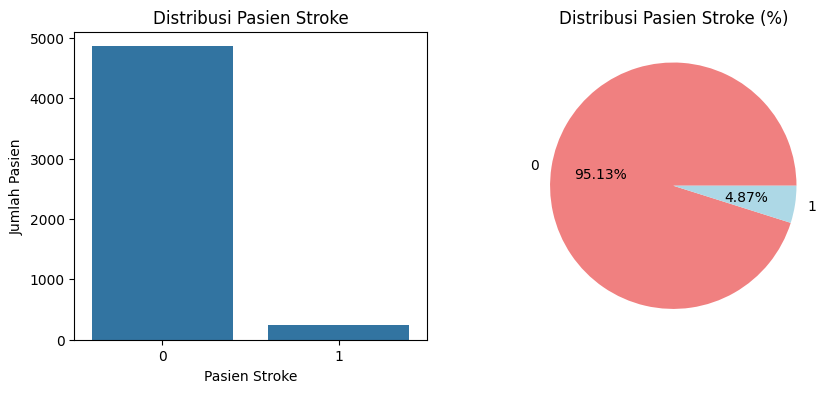

In [ ]:
# Distribusi Pasien Yang Mengalami Stroke
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data=data,x='stroke')
plt.title('Distribusi Pasien Stroke')
plt.xlabel('Pasien Stroke')
plt.ylabel('Jumlah Pasien')

plt.subplot(1,2,2)
stroke_counts = data['stroke'].value_counts()
plt.pie(stroke_counts, labels=stroke_counts.index, colors=['lightcoral', 'lightblue'], autopct='%.2f%%')
plt.title('Distribusi Pasien Stroke (%)')


Hasil visualisasi dari dataset terlihat bahwa jumlah pasien yang mengalami stroke sangat sedikit hanya sekitar 249 pasien atau 4.87% dibanding yang tidak mengalami stroke.

#Jumlah pasien berdasarkan jenis kelamin

In [ ]:
# Mengetahui Jumlah Pasien Berdasarkan Jenis Kelamin
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Text(0.5, 1.0, 'Distribusi Pasien Berdasarkan Jenis Kelamin (%)')

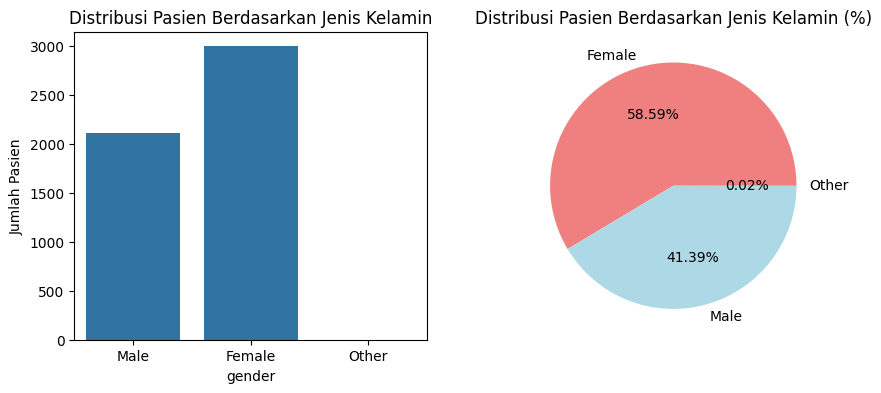

In [ ]:
# Distribusi Pasien Berdasarkan Jenis Kelamin
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data=data,x='gender')
plt.title('Distribusi Pasien Berdasarkan Jenis Kelamin')
plt.xlabel('gender')
plt.ylabel('Jumlah Pasien')

plt.subplot(1,2,2)
gender_counts = data['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, colors=['lightcoral', 'lightblue'], autopct='%.2f%%')
plt.title('Distribusi Pasien Berdasarkan Jenis Kelamin (%)')

#Jumlah pasien berdasarkan avg_glucose_level

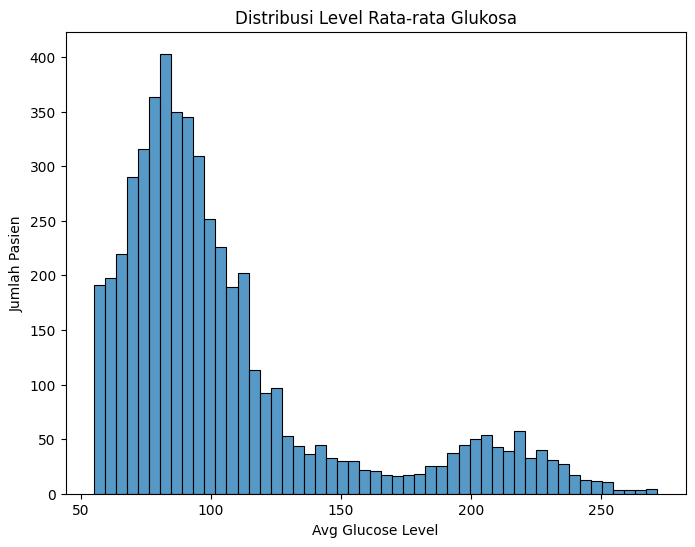

Avg_glucose_level < 70 mg/dL      : 754 pasien
Avg_glucose_level 70-130 mg/dL    : 3436 pasien
Avg_glucose_levevl > 130 mg/dl    : 920 pasien


In [ ]:
# Mengetahui jumlah pasien berdasarkan avg_glucose_level
pasien_dibawah = data[data['avg_glucose_level']<70].shape[0]
pasien_normal = data[(data['avg_glucose_level'] >= 70) & (data['avg_glucose_level'] <= 130)].shape[0]
pasien_diatas = data[data['avg_glucose_level']>130].shape[0]

# Distribusi Level Rata-Rata Glukosa
plt.figure(figsize=(8,6))

sns.histplot(data=data,x='avg_glucose_level')
plt.title('Distribusi Level Rata-rata Glukosa')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Jumlah Pasien')
plt.show()

print("Avg_glucose_level < 70 mg/dL      :",pasien_dibawah,"pasien")
print("Avg_glucose_level 70-130 mg/dL    :", pasien_normal,"pasien")
print("Avg_glucose_levevl > 130 mg/dl    :",pasien_diatas,'pasien')

#Jumlah pasien berdasarkan Body Mass Index (BMI)

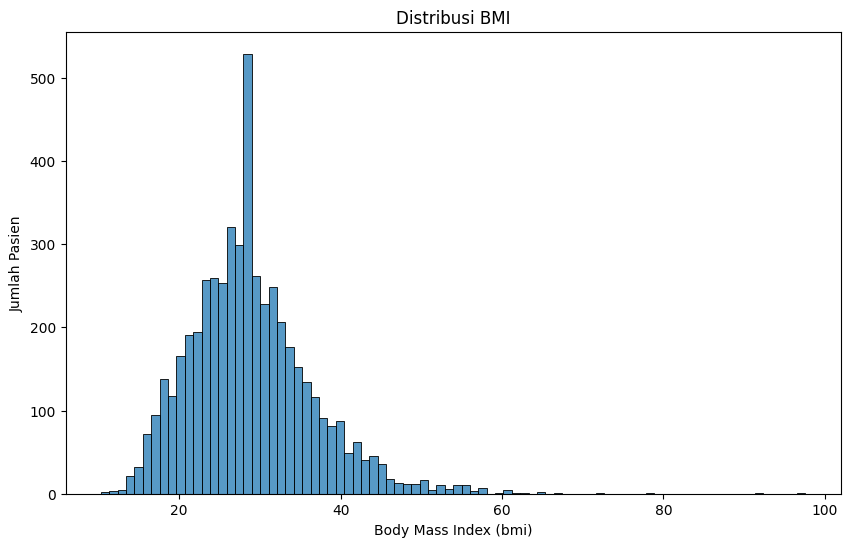

Pasien dengan berat badan kurang (bmi < 18,5 kg/m^2)      : 337 pasien
Pasien dengan berat badan normal (bmi 18,5 - 24,9 kg/m^2) : 1243 pasien
Pasien dengan berat badan lebih (bmi 25,0 - 29,9 kg/m^2)  : 1610 pasien
Pasien obesitas (bmi 30,0 kg/m^2 atau lebih)              : 1893 pasien


In [ ]:
# Mengetahui jumlah pasien berdasarkan bmi
bmi_kurang = data[data['bmi'] < 18.5].shape[0]
bmi_normal = data[(data['bmi'] >= 18.5) & (data['bmi'] <= 24.9)].shape[0]
bmi_lebih = data[(data['bmi'] >= 25) & (data['bmi'] <= 29.9)].shape[0]
bmi_obs = data[data['bmi'] > 30].shape[0]

# Distribusi
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='bmi')
plt.title('Distribusi BMI')
plt.xlabel('Body Mass Index (bmi)')
plt.ylabel('Jumlah Pasien')
plt.show()

print("Pasien dengan berat badan kurang (bmi < 18,5 kg/m^2)      :",bmi_kurang,"pasien")
print("Pasien dengan berat badan normal (bmi 18,5 - 24,9 kg/m^2) :",bmi_normal,"pasien")
print("Pasien dengan berat badan lebih (bmi 25,0 - 29,9 kg/m^2)  :",bmi_lebih,"pasien")
print("Pasien obesitas (bmi 30,0 kg/m^2 atau lebih)              :",bmi_obs,"pasien")

#Jumlah pasien stroke berdasarkan jenis kelamin

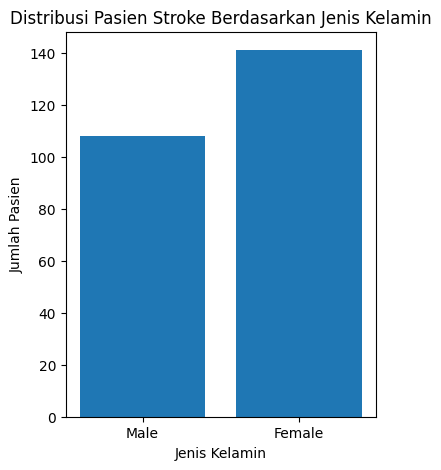

Pria terkena stroke   : 108 pasien
Wanita terkena stroke : 141 pasien


In [ ]:
# Mengetahui jumlah pasien stroke berdasarkan gender
pasien_male = data[(data['stroke'] == 1) & (data['gender'] == 'Male')].shape[0]
pasien_female = data[(data['stroke'] == 1) & (data['gender'] == 'Female')].shape[0]

# Distribusi Pasien Stroke Berdasarkan Gender
plt.figure(figsize=(4,5))

categories = ['Male','Female']
stroke_counts = [pasien_male, pasien_female]

plt.bar(categories,stroke_counts)
plt.title('Distribusi Pasien Stroke Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pasien')
plt.show()

print("Pria terkena stroke   :",pasien_male,"pasien")
print("Wanita terkena stroke :",pasien_female,"pasien")

#Jumlah pasien stroke berdasarkan usia

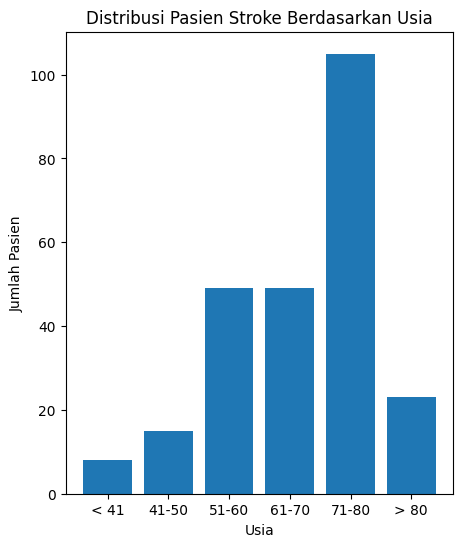

Usia < 41      : 8 pasien
Usia 41 s/d 50 : 15 pasien
Usia 51 s/d 60 : 49 pasien
Usia 61 s/d 70 : 49 pasien
Usia 71 s/d 80 : 105 pasien
Usia > 80      : 23 pasien


In [ ]:
# Mengetahui usia pasien yang terkena stroke
usia_pasien1 =  data[(data['age'] <=40) & (data['stroke'] == 1)].shape[0]
usia_pasien2 = data[(data['age'] > 40) & (data['age'] <= 50) & (data['stroke'] == 1)].shape[0]
usia_pasien3 = data[(data['age'] > 50) & (data['age'] <= 60) & (data['stroke'] == 1)].shape[0]
usia_pasien4 = data[(data['age'] > 60) & (data['age'] <= 70) & (data['stroke'] == 1)].shape[0]
usia_pasien5 = data[(data['age'] > 70) & (data['age'] <= 80) & (data['stroke'] == 1)].shape[0]
usia_pasien6 = data[(data['age'] > 80 ) & (data['stroke'] == 1)].shape[0]

# Dsitribusi pasien stoke berdasarkan usia
plt.figure(figsize=(5,6))

categories = ['< 41','41-50','51-60','61-70','71-80','> 80']
stroke_counts = [usia_pasien1, usia_pasien2, usia_pasien3, usia_pasien4, usia_pasien5, usia_pasien6]


plt.bar(categories,stroke_counts)
plt.title('Distribusi Pasien Stroke Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pasien')
plt.show()

print("Usia < 41      :",usia_pasien1,"pasien")
print("Usia 41 s/d 50 :",usia_pasien2,"pasien")
print("Usia 51 s/d 60 :",usia_pasien3,"pasien")
print("Usia 61 s/d 70 :",usia_pasien4,"pasien")
print("Usia 71 s/d 80 :",usia_pasien5,"pasien")
print("Usia > 80      :",usia_pasien6,"pasien")

#Jumlah pasien stroke berdasarkan level gula darah

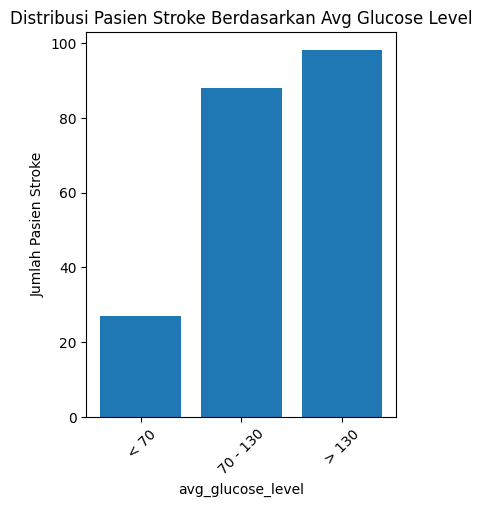

Avg glucose level < 70 mg/dL              : 27 pasien
Avg glucose level antara 70 dan 130 mg/dL : 88 pasien
Avg glucose level > 130 mg/dL             : 98 pasien


In [ ]:
# Mengetahui jumlah pasien stroke berdasarkan avg_glucose_level
pasien_stroke_dibawah = data[(data['avg_glucose_level'] < 70) & (data['stroke']==1)].shape[0]
pasien_stroke_normal = data[(data['avg_glucose_level'] >= 80) & (data['avg_glucose_level'] <= 130) & (data['stroke'] == 1)].shape[0]
pasien_stroke_diatas = data[(data['avg_glucose_level'] > 130) & (data['stroke'] == 1)].shape[0]

# Membuat bar plot
plt.figure(figsize=(4, 5))

categories = [' < 70', '70 - 130', '> 130']
stroke_counts = [pasien_stroke_dibawah, pasien_stroke_normal, pasien_stroke_diatas]

plt.bar(categories, stroke_counts)
plt.xlabel('avg_glucose_level')
plt.ylabel('Jumlah Pasien Stroke')
plt.title('Distribusi Pasien Stroke Berdasarkan Avg Glucose Level')
plt.xticks(rotation=45)
plt.show()

print("Avg glucose level < 70 mg/dL              :",pasien_stroke_dibawah,"pasien")
print("Avg glucose level antara 70 dan 130 mg/dL :",pasien_stroke_normal,"pasien")
print("Avg glucose level > 130 mg/dL             :",pasien_stroke_diatas,"pasien")

#Jumlah pasien stroke beradasarkan body mass index (bmi)

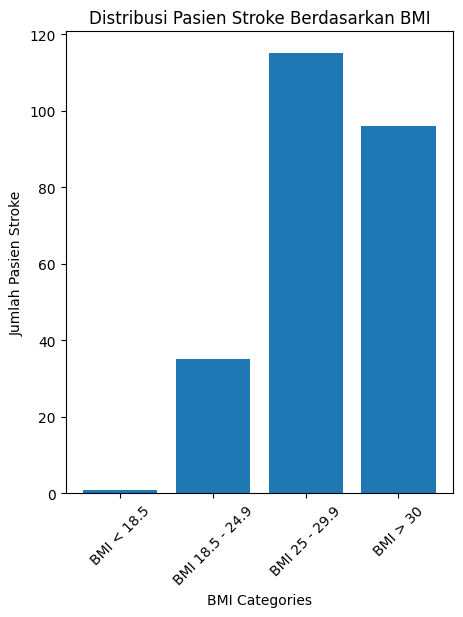

Berat badan kurang (BMI < 18.5)    : 1 pasien
Berat badan normal (BMI 18.5-24.9) : 35 pasien
Berat badan lebih (BMI 25-29.9)    : 115 pasien
Berat badan obesitas (BMI > 30)  : 96 pasien


In [ ]:
# Mengetahui jumlah pasien stroke berdasarkan bmi
bmi_kurang_stroke = data[(data['bmi'] < 18.5) & (data['stroke']==1)].shape[0]
bmi_normal_stroke = data[(data['bmi'] >= 18.5) & (data['bmi'] <= 24.9) & (data['stroke']==1)].shape[0]
bmi_lebih_stroke = data[(data['bmi'] >= 25) & (data['bmi'] <= 29.9) & (data['stroke']==1) ].shape[0]
bmi_obs_stroke = data[(data['bmi'] > 30) & (data['stroke']==1)].shape[0]

# Membuat bar plot
plt.figure(figsize=(5, 6))

categories = ['BMI < 18.5', 'BMI 18.5 - 24.9', 'BMI 25 - 29.9', 'BMI > 30']
stroke_counts = [bmi_kurang_stroke, bmi_normal_stroke, bmi_lebih_stroke, bmi_obs_stroke]

plt.bar(categories, stroke_counts)
plt.xlabel('BMI Categories')
plt.ylabel('Jumlah Pasien Stroke')
plt.title('Distribusi Pasien Stroke Berdasarkan BMI')
plt.xticks(rotation=45)
plt.show()

print("Berat badan kurang (BMI < 18.5)    :",bmi_kurang_stroke,"pasien")
print("Berat badan normal (BMI 18.5-24.9) :",bmi_normal_stroke,"pasien")
print("Berat badan lebih (BMI 25-29.9)    :",bmi_lebih_stroke,"pasien")
print("Berat badan obesitas (BMI > 30)  :",bmi_obs_stroke,"pasien")

#Jumlah pasien stroke berdasarkan hypertensi

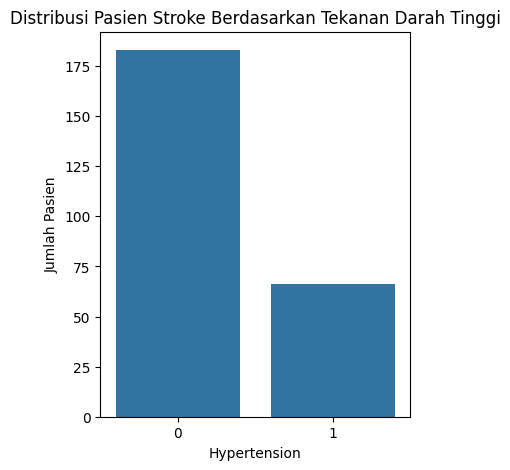

Tidak hypertensi  : 183 pasien
Hypertensi        : 66 pasien


In [ ]:
# Mengetahui jumlah pasien stroke berdasarkan hypertensi
pasien_hyper0 = data[(data['stroke'] == 1) & (data['hypertension'] == 0)].shape[0]
pasien_hyper1 = data[(data['stroke'] == 1) & (data['hypertension'] == 1)].shape[0]

# Distribusi Pasien Stroke Berdasarkan Tekanan Darah Tinggi
plt.figure(figsize=(4,5))
sns.countplot(data=data[data['stroke']==1], x='hypertension')
plt.title('Distribusi Pasien Stroke Berdasarkan Tekanan Darah Tinggi')
plt.xlabel('Hypertension')
plt.ylabel('Jumlah Pasien')
plt.show()

print("Tidak hypertensi  :",pasien_hyper0,"pasien")
print("Hypertensi        :",pasien_hyper1,"pasien")

#Jumlah pasien stroke berdasarkan heart dease

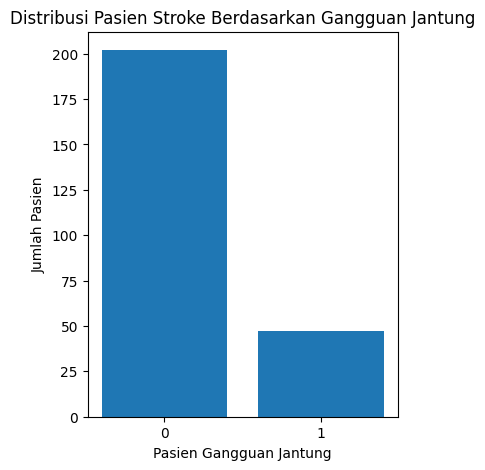

Tanpa gangguan jantung  : 202 pasien
Ada gangguan jantung : 47 pasien


In [ ]:
# Mengetahui jumlah pasien stroke berdasarkan heart dease
pasien_heart0 = data[(data['stroke'] == 1) & (data['heart_disease'] == 0)].shape[0]
pasien_heart1 = data[(data['stroke'] == 1) & (data['heart_disease'] == 1)].shape[0]

# Dirstribusi Pasien Stroke  Berdasarkan Gangguan Jantung
plt.figure(figsize=(4,5))

categories = ['0','1']
stroke_counts = [pasien_heart0,pasien_heart1]

plt.bar(categories, stroke_counts)
plt.title('Distribusi Pasien Stroke Berdasarkan Gangguan Jantung')
plt.xlabel('Pasien Gangguan Jantung')
plt.ylabel('Jumlah Pasien')
plt.show()

print("Tanpa gangguan jantung  :",pasien_heart0,"pasien")
print("Ada gangguan jantung :",pasien_heart1,"pasien")

#Jumlah pasien stroke berdasarkan status pernikahan

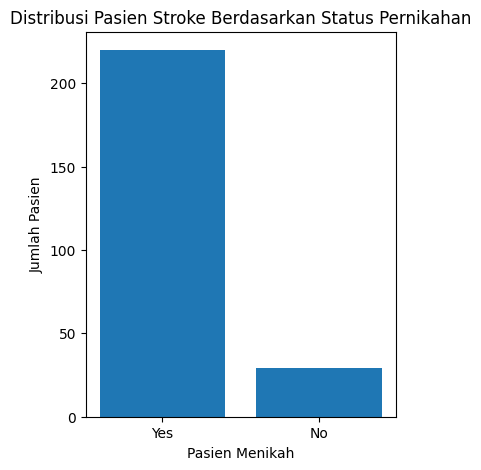

Menikah      : 220 pasien
Tidak menikah: 29 pasien


In [ ]:
# Mengetahui jumlah pasien stroke berdasarkan status pernikahan
pasien_marriedYes = data[(data['stroke'] == 1) & (data['ever_married'] == 'Yes')].shape[0]
pasien_marriedNo = data[(data['stroke'] == 1) & (data['ever_married'] == 'No')].shape[0]

# Distribusi Pasien Stroke Berdasarkan Status Pernikahan
plt.figure(figsize=(4,5))

categories = ['Yes','No']
stroke_counts = [pasien_marriedYes,pasien_marriedNo]

plt.bar(categories, stroke_counts)
plt.title('Distribusi Pasien Stroke Berdasarkan Status Pernikahan')
plt.xlabel('Pasien Menikah')
plt.ylabel('Jumlah Pasien')
plt.show()

print("Menikah      :",pasien_marriedYes,"pasien")
print("Tidak menikah:",pasien_marriedNo,"pasien")

#Jumlah pasien stroke berdasarkan tempat tinggal

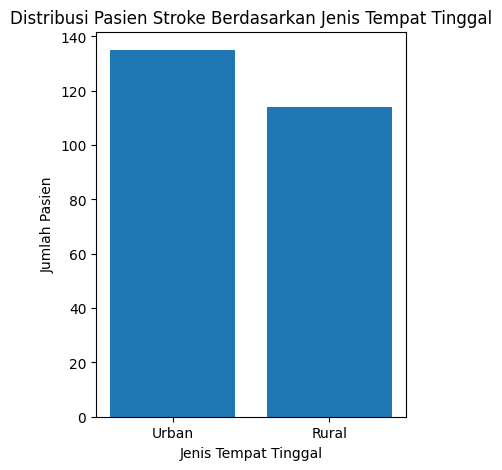

Perkotaan (Urban): 135 pasien
Pedesaan (Rural) : 114 pasien


In [ ]:
# Mengetahui jumlah pasien stroke berdasarkan jenis tempat tinggal
pasien_urban = data[(data['stroke'] == 1) & (data['Residence_type'] == 'Urban')].shape[0]
pasien_rural = data[(data['stroke'] == 1) & (data['Residence_type'] == 'Rural')].shape[0]

# Distribusi Pasien Stroke Berdasarkan Janis Tempat Tinggal
plt.figure(figsize=(4,5))

categories = ['Urban','Rural']
stroke_counts = [pasien_urban,pasien_rural]

plt.bar(categories, stroke_counts)
plt.title('Distribusi Pasien Stroke Berdasarkan Jenis Tempat Tinggal')
plt.xlabel('Jenis Tempat Tinggal')
plt.ylabel('Jumlah Pasien')
plt.show()

print("Perkotaan (Urban):",pasien_urban,"pasien")
print("Pedesaan (Rural) :",pasien_rural,"pasien")

#Jumlah pasien stroke berdasarkan jenis pekerjaan

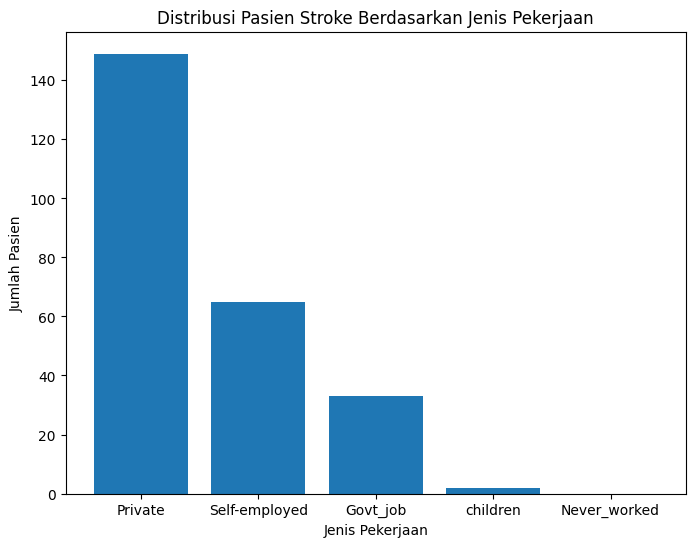

Pekerja swasta       : 149 pasien
Usaha sendiri        : 65 pasien
Pekerja pemerintah   : 33 pasien
Anak-anak            : 2 pasien
Belum pernah bekerja : 0 pasien


In [ ]:
# Mengetahui jumlah pasien stroke berdasarkan jenis pekerjaan
pasien_private = data[(data['stroke'] == 1) & (data['work_type'] == 'Private')].shape[0]
pasien_self = data[(data['stroke'] == 1) & (data['work_type'] == 'Self-employed')].shape[0]
pasien_govt = data[(data['stroke'] == 1) & (data['work_type'] == 'Govt_job')].shape[0]
pasien_child = data[(data['stroke'] == 1) & (data['work_type'] == 'children')].shape[0]
pasien_never = data[(data['stroke'] == 1) & (data['work_type'] == 'Never_worked')].shape[0]

# Distribusi Pasien Stroke Berdasarkan Janis Pekerjaan
plt.figure(figsize=(8,6))

categories = ['Private','Self-employed', 'Govt_job','children','Never_worked']
stroke_counts = [pasien_private,pasien_self,pasien_govt,pasien_child,pasien_never]

plt.bar(categories, stroke_counts)
plt.title('Distribusi Pasien Stroke Berdasarkan Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah Pasien')
plt.show()

print("Pekerja swasta       :",pasien_private,"pasien")
print("Usaha sendiri        :",pasien_self,"pasien")
print("Pekerja pemerintah   :",pasien_govt,"pasien")
print("Anak-anak            :",pasien_child,"pasien")
print("Belum pernah bekerja :",pasien_never,"pasien")

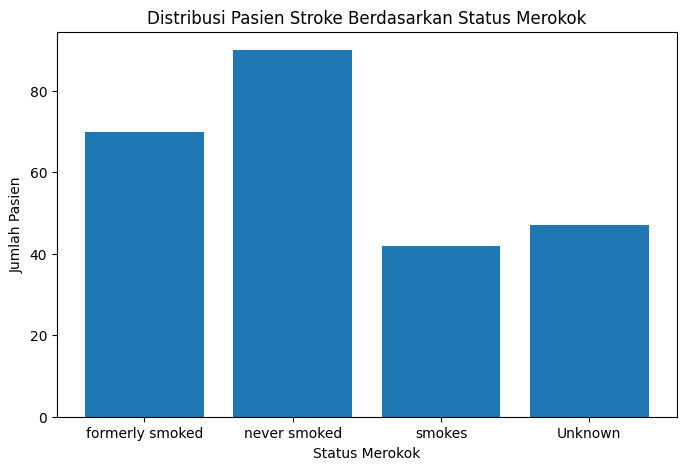

Pernah merokok: 70 pasien
Tidak merokok : 90 pasien
Merokok: 42 pasien
Unknown : 47 pasien


In [ ]:
# Mengetahui jumlah pasien stroke berdasarkan status merokok
pasien_formerly = data[(data['stroke'] == 1) & (data['smoking_status'] == 'formerly smoked')].shape[0]
pasien_never = data[(data['stroke'] == 1) & (data['smoking_status'] == 'never smoked')].shape[0]
pasien_smokes = data[(data['stroke'] == 1) & (data['smoking_status'] == 'smokes')].shape[0]
pasien_unk = data[(data['stroke'] == 1) & (data['smoking_status'] == 'Unknown')].shape[0]

# Distribusi Pasien Stroke Berdasarkan Status Merokok
plt.figure(figsize = (8,5))

categories = ['formerly smoked','never smoked', 'smokes','Unknown',]
stroke_counts = [pasien_formerly,pasien_never,pasien_smokes,pasien_unk]

plt.bar(categories, stroke_counts)
plt.title('Distribusi Pasien Stroke Berdasarkan Status Merokok')
plt.xlabel('Status Merokok')
plt.ylabel('Jumlah Pasien')
plt.show()

print("Pernah merokok:",pasien_formerly,"pasien")
print("Tidak merokok :",pasien_never,"pasien")
print("Merokok:",pasien_smokes ,"pasien")
print("Unknown :",pasien_unk,"pasien")

#Split Data Training dan Testing

In [ ]:
# Hapus column 'id' dan keluarkan column gender yang hanya male dan female
data = data.drop('id', axis=1)
data = data[data['gender'] != 'Other']
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#One Hot Encoding
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type',  'Residence_type', 'smoking_status'], drop_first=True)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0


#Split Data

In [ ]:
#Split train dan test
from sklearn.model_selection import train_test_split

feature = data.drop('stroke', axis=1)
target = data['stroke']
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,age,2.845477
2,hypertension,1.123001
3,heart_disease,1.114534
4,avg_glucose_level,1.114354
5,bmi,1.299862
6,gender_Male,1.033612
7,ever_married_Yes,1.966249
8,work_type_Never_worked,1.061224
9,work_type_Private,2.354413
10,work_type_Self-employed,1.923090


Vif < 4, tidak ada potensi multicollinearity

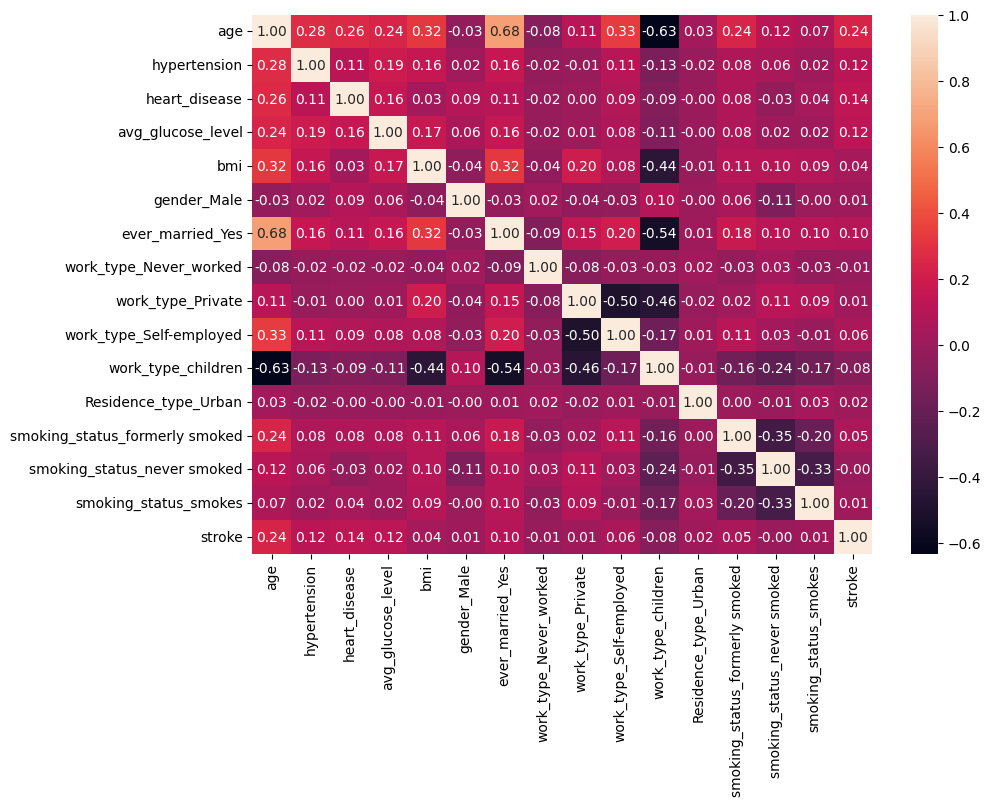

In [ ]:
# heatmap correlation
data_train = pd.concat([feature_train, target_train], axis=1)
corr = data_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Heatmap tidak menunjukkan adanya feature yang berkolarasi tinggi.

In [ ]:
#Cek kolom stroke
data['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

#KNN Classification

In [ ]:
# define KNN Classification model
knn_clf = KNeighborsClassifier()

# hyperparameter tuning dengan scoring recall
parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(feature_train, target_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.026458,2
1,{'n_neighbors': 3},0.047937,1
2,{'n_neighbors': 4},0.005405,3
3,{'n_neighbors': 5},0.005405,3
4,{'n_neighbors': 6},0.005405,3
5,{'n_neighbors': 7},0.005405,3
6,{'n_neighbors': 8},0.000000,7


# Evaluation

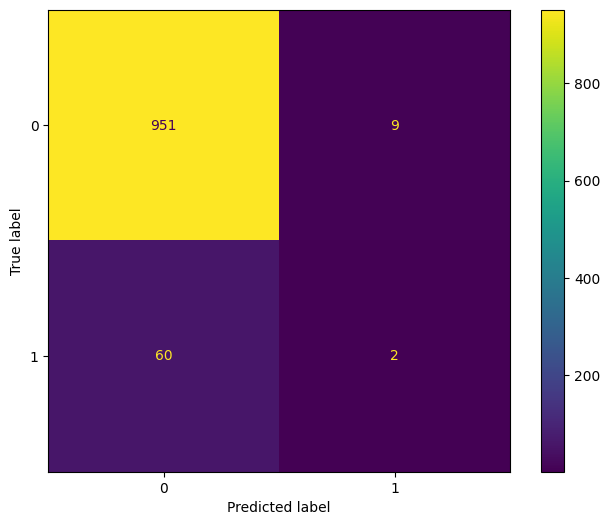

In [ ]:
# plotting confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
target_pred = knn_clf_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Dari confusion matrix diatas dapat dijelaskan :

951 ▶ ada 951 pasien yang terprediksi tidak srtoke tetapi sebenarnya stroke

9   ▶ ada 9 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke

60  ▶  ada 60 pasien yang terprediksi tidak stroke tetapi sebenarnya stroke.

2   ▶ ada 2 pasien yang terprediksi stroke dan benar stroke

In [ ]:
# classification report
target_pred = knn_clf_gridcv.best_estimator_.predict(feature_test)
print("Best Parameters:", knn_clf_gridcv.best_params_)
print(classification_report(target_test, target_pred))

Best Parameters: {'n_neighbors': 3}
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.18      0.03      0.05        62

    accuracy                           0.93      1022
   macro avg       0.56      0.51      0.51      1022
weighted avg       0.89      0.93      0.91      1022



Dari hasil classification report diatas terlihat bahwa :

Akurasi =  93 %

Kelas "0" :

Presisi 94% artinya dari 100 pasien yang diprediksi tidak stroke, 94 pasien benar tidak stroke.

Recall 99% artinya dari 100 pasien yang diprediksi tidak stroke, hanya 1 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

Kelas "1" :

Presisi 18% artinya dari 100 pasien yang diprediksi stroke, hanya 18 pasien yang benar stroke.

Recall  3% artinya dari 100 pasien yang diprediksi stroke, ada 97 pasien yang  terprediksi tidak stroke tetapi sebenarnya stroke.

Model hanya membaca data dengan baik untuk pasien yang tidak terkena stroke (kelas "0"), tetapi model tidak bisa membaca data untuk pasien stroke (kelas "1").



In [ ]:
#AUC - ROC
from sklearn.metrics import roc_auc_score, roc_curve

target_probabilities =knn_clf_gridcv.best_estimator_.predict_proba(feature_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_probabilities)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.6537298387096775


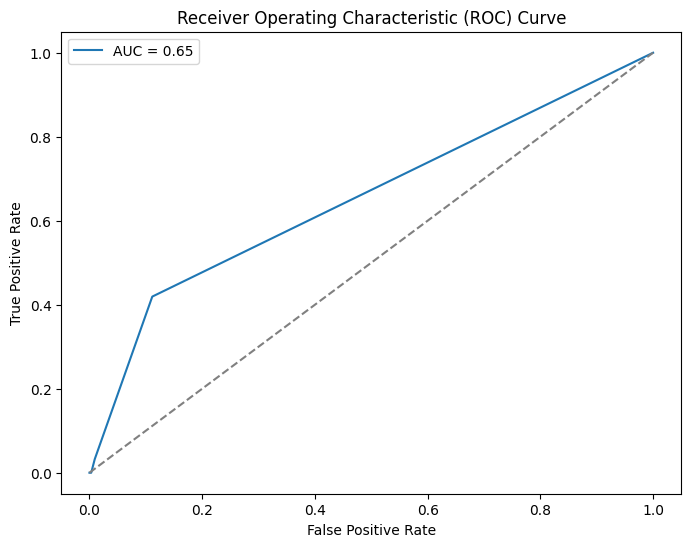

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, target_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Random Forest Classification

In [ ]:
# define random forest classifier model
rf_clf = RandomForestClassifier(random_state=42)

# hyperparameter tuning dengan scoring recall
parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# Gunakan recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(feature_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.0,1
1,"{'max_depth': 1, 'n_estimators': 20}",0.0,1
2,"{'max_depth': 1, 'n_estimators': 30}",0.0,1
3,"{'max_depth': 1, 'n_estimators': 40}",0.0,1
4,"{'max_depth': 1, 'n_estimators': 50}",0.0,1
5,"{'max_depth': 2, 'n_estimators': 10}",0.0,1
6,"{'max_depth': 2, 'n_estimators': 20}",0.0,1
7,"{'max_depth': 2, 'n_estimators': 30}",0.0,1
8,"{'max_depth': 2, 'n_estimators': 40}",0.0,1
9,"{'max_depth': 2, 'n_estimators': 50}",0.0,1


#Evaluation

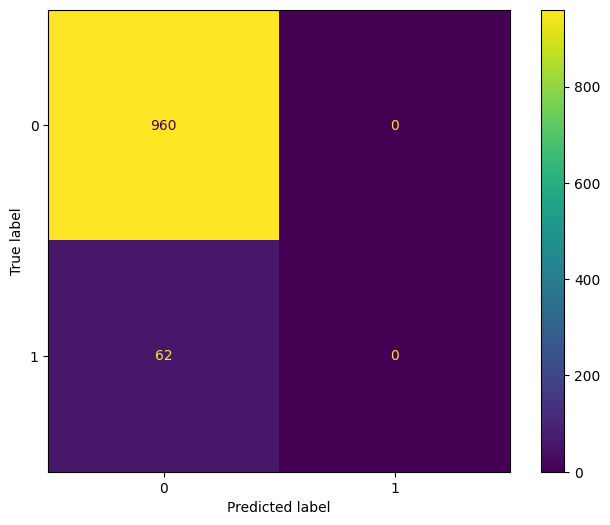

In [ ]:
# the confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
target_pred = rf_clf_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Dari confusion matrix diatas dapat dijelaskan :

960 ▶ ada 960 pasien yang terprediksi tidak stroke dan aktualnya benar tidak stroke.

62 ▶ ada 62 paseien yang terprediksi tidak stroke tetapi sebenarnya stroke.

In [ ]:
# classification report
target_pred = rf_clf_gridcv.best_estimator_.predict(feature_test)
print("Best Parameters:", rf_clf_gridcv.best_params_)
print(classification_report(target_test, target_pred))

Best Parameters: {'max_depth': 1, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dari hasil classification report diatas terlihat bahwa :

Akurasi =  94 %

Kelas "0" :

Presisi 94% artinya dari 100 pasien diprediksi tidak stroke, 94 pasien  benar tidak stroke.

Recall 100% artinya dari 100 pasien diprediksi tidak stroke, semua pasien terprediksi tidak stroke.

Kelas "1" :

Presisi 0% artinya dari 100 pasien yang diprediksi stroke, tidak ada pasien yang benar stroke.

Recall  0% artinya dari 100 yang diprediksi stroke, semua pasien terprediksi tidak stroke tetapi sebenarnya stroke.

Model hanya membaca data dengan baik untuk pasien yang tidak terkena stroke (kelas "0"), tetapi model tidak bisa membaca data untuk pasien stroke (kelas "1").

In [ ]:
#AUC - ROC
from sklearn.metrics import roc_auc_score, roc_curve

target_probabilities =rf_clf_gridcv.best_estimator_.predict_proba(feature_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_probabilities)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.8179015456989247


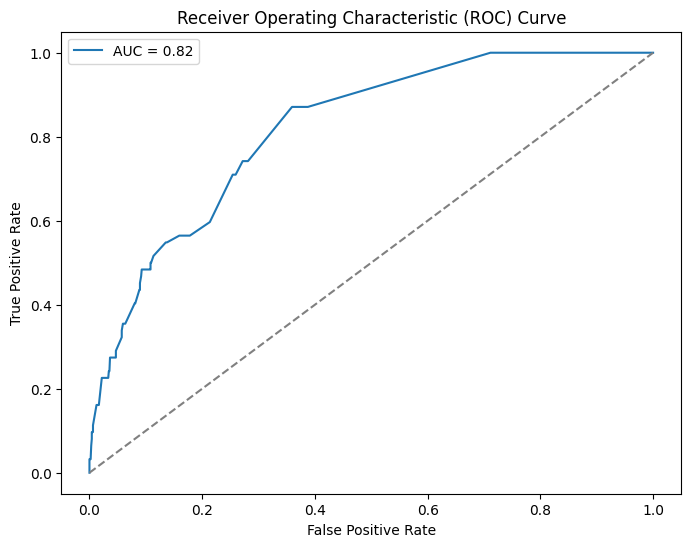

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, target_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Logistic Regression

In [ ]:
# define Logistic Regression model
logistic_classifier = LogisticRegression(max_iter=1000)

# hyperparameter tuning dengan scoring recall
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

logistic_classifier_gridcv = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5, scoring='recall')

logistic_classifier_gridcv.fit(feature_train, target_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(logistic_classifier_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'C': 0.001, 'penalty': 'l2'}",0.000000,4
1,"{'C': 0.01, 'penalty': 'l2'}",0.000000,4
2,"{'C': 0.1, 'penalty': 'l2'}",0.005263,2
3,"{'C': 1, 'penalty': 'l2'}",0.005263,2
4,"{'C': 10, 'penalty': 'l2'}",0.010669,1


#Evaluation

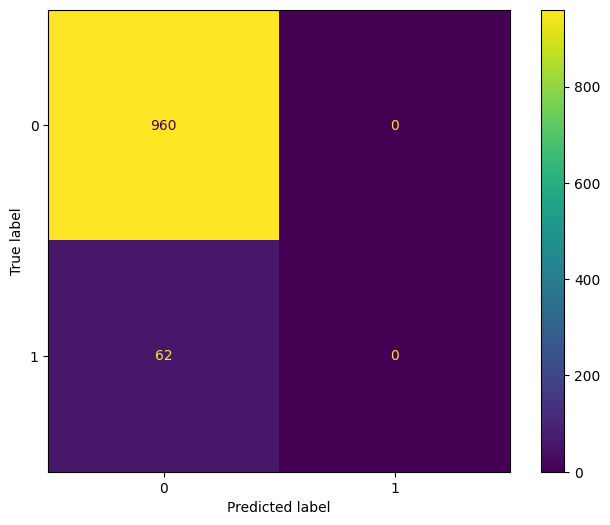

In [ ]:
# the confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
target_pred = logistic_classifier_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=logistic_classifier_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=logistic_classifier_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Dari confusion matrix diatas dapat dijelaskan :

960 ▶ ada 960 pasien yang terprediksi tidak stroke dan aktualnya benar tidak stroke.

62 ▶ pasien yang terprediksi tidak stroke tetapi sebenarnya stroke.

In [ ]:
# classification report
target_pred = logistic_classifier_gridcv.best_estimator_.predict(feature_test)
print("Best Parameters:", logistic_classifier_gridcv.best_params_)
print(classification_report(target_test, target_pred))

Best Parameters: {'C': 10, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dari hasil classification report diatas terlihat bahwa :

Akurasi = 94 %

Kelas "0" :

Presisi 94% artinya dari 100 pasien diprediksi tidak stroke, 94 pasien benar tidak stroke.

Recall 100% artinya dari 100 pasien diprediksi tidak stroke, semua pasien terprediksi tidak stroke.

Kelas "1" :

Presisi 0% artinya dari 100 pasien yang diprediksi stroke, tidak ada pasien yang benar stroke.

Recall 0% artinya dari 100 pasien yang diprediksi stroke, semua pasien terprediksi tidak stroke tetapi sebenarnya stroke.

Model hanya membaca data dengan baik untuk pasien yang tidak terkena stroke (kelas "0", tetapi model tidak bisa mambaca data untuk pasien stroke (keals "1").

In [ ]:
#AUC - ROC
from sklearn.metrics import roc_auc_score, roc_curve

target_probabilities =logistic_classifier_gridcv.best_estimator_.predict_proba(feature_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_probabilities)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.8437163978494624


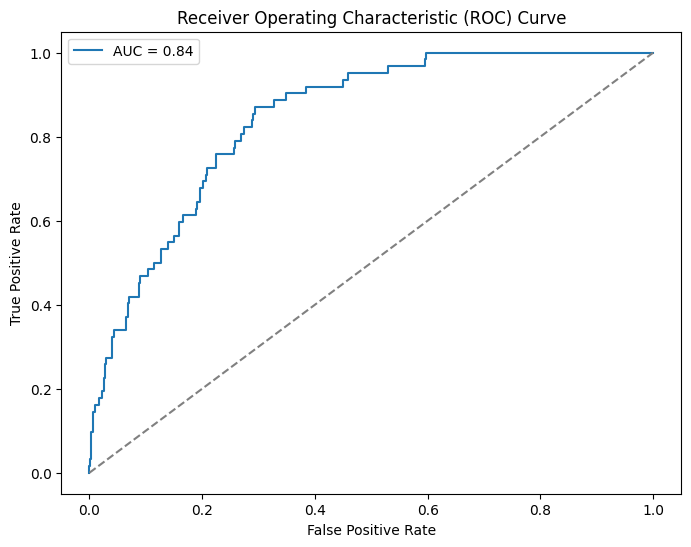

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, target_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Decision Tree

In [ ]:
# define Decision Tree model
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# hyperparameter tuning dengan scoring recall
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 5, 8],
    'min_samples_leaf': [2, 4, 5, 8]
}

decision_tree_classifier_gridcv = GridSearchCV(estimator=decision_tree_classifier, param_grid=param_grid, cv=5, scoring='recall')
decision_tree_classifier_gridcv.fit(feature_train, target_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [2, 4, 5, 8],
                         'min_samples_split': [2, 4, 5, 8]},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(decision_tree_classifier_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.085491,6
1,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.085491,6
2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.096728,1
3,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.080228,12
4,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.053770,89
...,...,...,...
123,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.075249,16
124,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.042674,112
125,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.042674,112
126,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.042674,112


#Evaluation

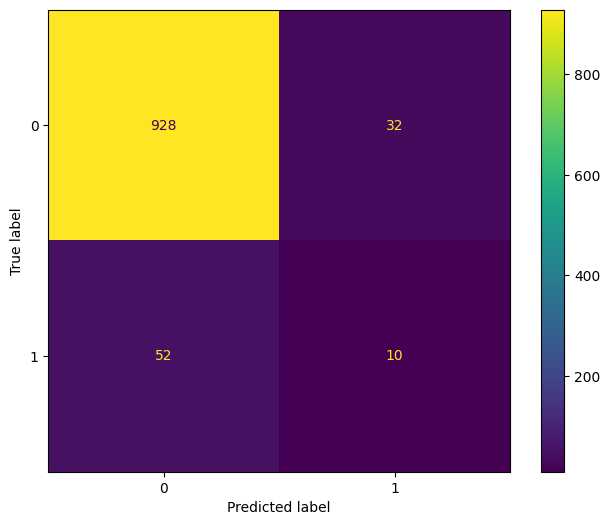

In [ ]:
# the confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
target_pred = decision_tree_classifier_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=decision_tree_classifier_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=decision_tree_classifier_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Dari confussion matrix diatas dapat dijelaskan :

928 ▶ ada 928 pasien yang terprediksi tidak stroke dan benar tidak stroke

32 ▶ ada 32 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke

52 ▶  ada 52 pasien yang terpediksi tidak stroke tetapi sebenarnya   stroke.

10 ▶ ada 10 pasien yang terprediksi stroke dan memang benar stroke





In [ ]:
# classification report
target_pred = decision_tree_classifier_gridcv.best_estimator_.predict(feature_test)

print("Best Parameters:", decision_tree_classifier_gridcv.best_params_)
print(classification_report(target_test, target_pred))


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       960
           1       0.24      0.16      0.19        62

    accuracy                           0.92      1022
   macro avg       0.59      0.56      0.57      1022
weighted avg       0.90      0.92      0.91      1022



Dari hasil classification report diatas terlihat bahwa :

Akurasi = 92 %

Kelas "0" :

Presisi 95% artinya dari 100 pasien yang diprediksi tidak stroke, ada 95 pasien benar tidak stroke.

Recall 97% artinya dari 100 pasien diprediksi tidak stroke, hanya 3 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

Kelas "1" :

Presisi 24% artinya dari 100 pasien yang diprediksi stroke, ada 24 pasien yang benar stroke.

Recall 16% artinya dari 100 yang diprediksi stroke, ada 84 pasien yang terprediksi tidak stroke tetapi sebenanya stroke.

Model hanya membaca data dengan baik untuk pasien yang tidak terkena stroke (kelas "0"), tetapi model tidak bisa mambaca data dengan baik untuk pasien stroke (kelas "1").

Kesimpulan :

Dari ke 4 permodelan yang sudah dilakukan, model cenderung bekerja dengan baik untuk data di kelas "0" dibanding kelas "1". Hal ini bisa terjadi karena dataset yang digunakan sangat imbalance (extreme imbalance) dimana kelas "0" merupakan data mayoritas dan kelas "1" merupakan data minoritas.

Berdasarkan hal tersebut maka dicoba untuk dilakukan metode undersampling dan oversampling agar data menajadi balance.

In [ ]:
#AUC - ROC
from sklearn.metrics import roc_auc_score, roc_curve

target_probabilities =decision_tree_classifier_gridcv.best_estimator_.predict_proba(feature_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_probabilities)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.5792758736559139


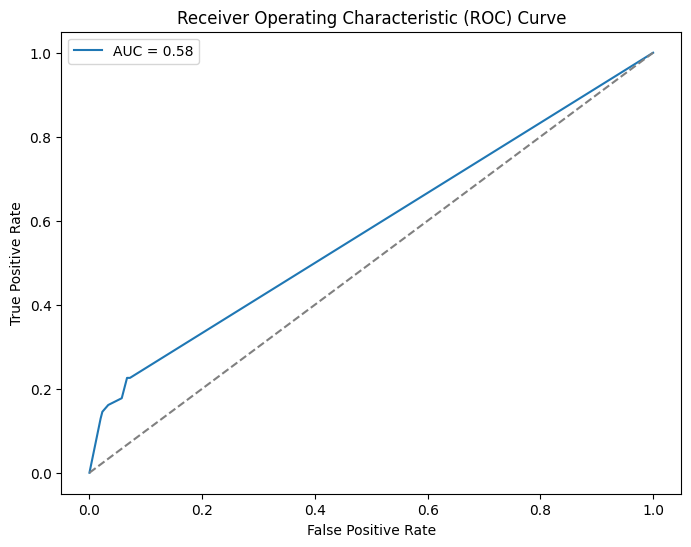

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, target_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = data.drop('stroke', axis=1)
y = data['stroke']
# Menerapkan undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)
# Data yang telah diundersample
data_undersampler = pd.concat([X_resampled, y_resampled], axis=1)

print(data_undersampler['stroke'].value_counts())

0    249
1    249
Name: stroke, dtype: int64


In [ ]:
#Split train dan test
feature = data_undersampler.drop('stroke', axis=1)
target = data_undersampler['stroke']
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

#KNN Classification

In [ ]:
# define KNN Classification model
knn_clf = KNeighborsClassifier()

# hyperparameter tuning dengan scoring recall
parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(feature_train, target_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.470,7
1,{'n_neighbors': 3},0.730,3
2,{'n_neighbors': 4},0.615,6
3,{'n_neighbors': 5},0.745,2
4,{'n_neighbors': 6},0.650,5
5,{'n_neighbors': 7},0.775,1
6,{'n_neighbors': 8},0.720,4


#Evaluation

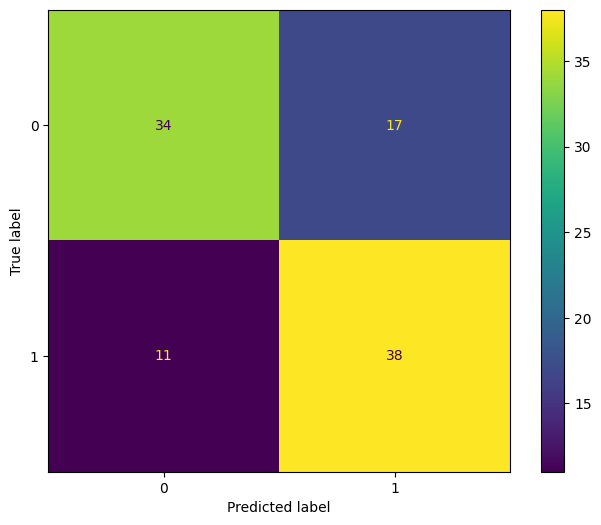

In [ ]:
# plotting confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
target_pred = knn_clf_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Dari confusion matrix diatas dapat dijelaskan :

34 ▶ ada 34 pasien yang terprediksi tidak stroke dan benar tidak stroke.

17 ▶ ada 17 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

11 ▶ ada 11 pasien yang terprediksi tidak stroke tetapi sebenarnya stroke.

38 ▶ ada 38 pasien yang terprediksi stroke dan benar stroke.

In [ ]:
# classification report
target_pred = knn_clf_gridcv.best_estimator_.predict(feature_test)
print("Best Parameters:", knn_clf_gridcv.best_params_)
print(classification_report(target_test, target_pred))

Best Parameters: {'n_neighbors': 7}
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        51
           1       0.69      0.78      0.73        49

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



Dari hasil classification report diatas terlihat bahwa :

Akurasi = 72 %

Kelas "0" :

Presisi 76% artinya dari 100 pasien yang diprediksi tidak stroke, ada 76 pasien benar tidak stroke.

Recall 67% artinya dari 100 pasien yang diprediksi tidak stroke, ada 33 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

Kelas "1" :

Presisi 69% artinya dari 100 pasien yang diprediksi stroke, ada 69 pasien yang benar stroke.

Recall 78% artinya dari 100 pasien yang diprediksi stroke, ada 22 pasien yang terprediksi tidak stroke tetapi sebenarnya stroke.

Disini terlihat bahwa permodelan dapat membaca data dengan cukup baik untuk pasien yang tidak stroke dan yang stroke.

In [ ]:
#AUC - ROC
from sklearn.metrics import roc_auc_score, roc_curve

target_probabilities =knn_clf_gridcv.best_estimator_.predict_proba(feature_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_probabilities)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.7697078831532613


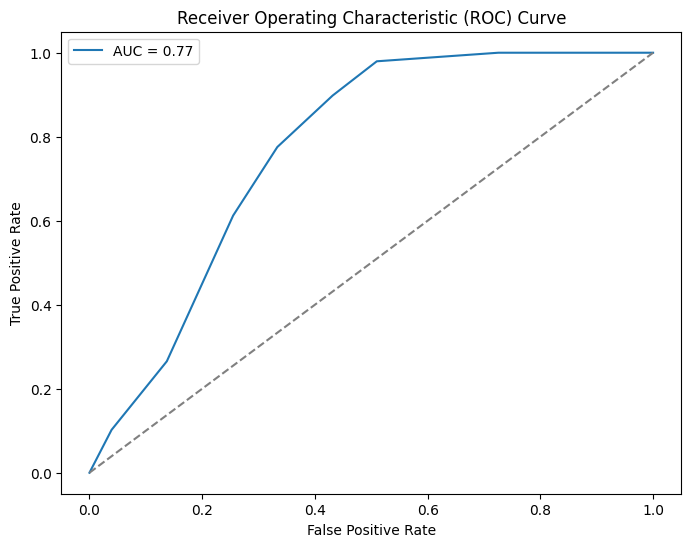

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, target_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Random Forest Classification

In [ ]:
# define random forest classifier model
rf_clf = RandomForestClassifier(random_state=42)

# hyperparameter tuning dengan scoring recall
parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(feature_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.660,25
1,"{'max_depth': 1, 'n_estimators': 20}",0.765,20
2,"{'max_depth': 1, 'n_estimators': 30}",0.775,16
3,"{'max_depth': 1, 'n_estimators': 40}",0.770,19
4,"{'max_depth': 1, 'n_estimators': 50}",0.780,13
5,"{'max_depth': 2, 'n_estimators': 10}",0.720,23
6,"{'max_depth': 2, 'n_estimators': 20}",0.750,22
7,"{'max_depth': 2, 'n_estimators': 30}",0.775,16
8,"{'max_depth': 2, 'n_estimators': 40}",0.790,11
9,"{'max_depth': 2, 'n_estimators': 50}",0.790,11


#Evaluation

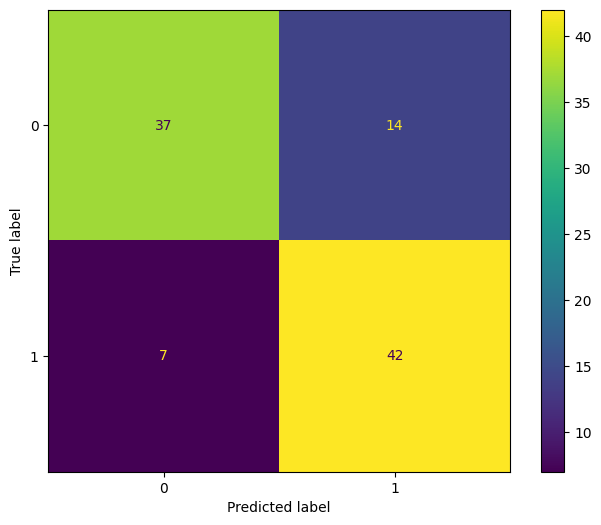

In [ ]:
# the confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
target_pred = rf_clf_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Dari confusiion matrix diatas dapat dijelaskan :

37 ▶ ada 37 pasien yang terprediksi tidak stroke dan benar tidak stroke.

14 ▶ ada 14 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

7 ▶ ada 7 pasien yang terprediksi tidak stoke tetapi sebenarnya stroke.

42 ▶ ada 42 pasien yang terprediksi stroke dan benar stroke.

In [ ]:
# classification report
target_pred = rf_clf_gridcv.best_estimator_.predict(feature_test)
print("Best Parameters:", rf_clf_gridcv.best_params_)
print(classification_report(target_test, target_pred))

Best Parameters: {'max_depth': 4, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        51
           1       0.75      0.86      0.80        49

    accuracy                           0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



Dari hasil classification report diatas terlihat bahwa :

Akurasi = 79 %

Kelas "0" :

Presisi 84% artinya dari 100 pasien yang diprediksi tidak stroke, ada 84 pasien  benar tidak stroke.

Recall 73% artinya dari 100 pasien yang diprediksi tidak stroke, ada 27 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

Kelas "1" :

Presisi 75% artinya dari 100 pasien yang diprediksi stroke, ada 75 pasien yang benar stroke.

Recall 86% artinya dari 100 pasien yang diprediksi stroke, ada 14 pasien yang yang terprediksi tidak stroke tetapi sebenarnya stroke.

Disini terlihat bahwa permodelan dapat membaca data dengan cukup baik untuk pasien yang tidak stroke dan stroke.

In [ ]:
#AUC - ROC
from sklearn.metrics import roc_auc_score, roc_curve

target_probabilities =rf_clf_gridcv.best_estimator_.predict_proba(feature_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_probabilities)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.8587434973989596


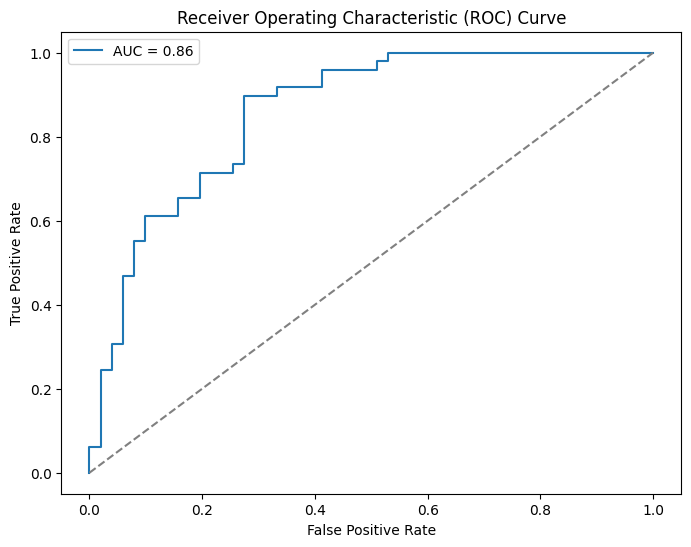

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, target_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Logistic Regression

In [ ]:
# define model Logistic Regression
logistic_classifier = LogisticRegression(max_iter=1000)

# hyperparameter tuning dengan scoring recall
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

logistic_classifier_gridcv = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5, scoring='recall')

logistic_classifier_gridcv.fit(feature_train, target_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(logistic_classifier_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'C': 0.001, 'penalty': 'l2'}",0.805,1
1,"{'C': 0.01, 'penalty': 'l2'}",0.790,3
2,"{'C': 0.1, 'penalty': 'l2'}",0.800,2
3,"{'C': 1, 'penalty': 'l2'}",0.790,4
4,"{'C': 10, 'penalty': 'l2'}",0.785,5


#Evaluation

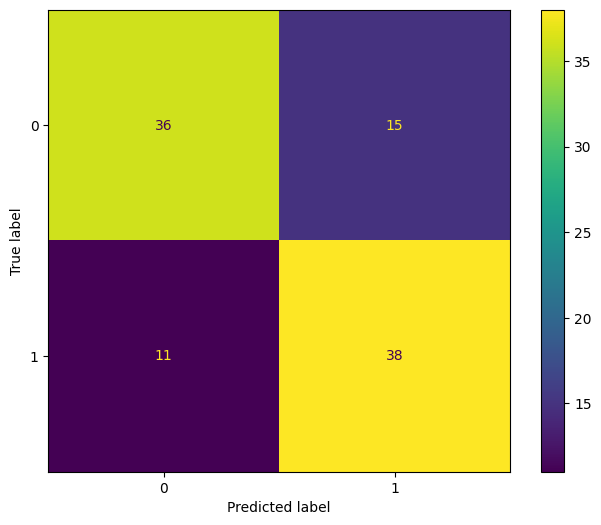

In [ ]:
# the confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
target_pred = logistic_classifier_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=logistic_classifier_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=logistic_classifier_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Dari hasil confusion matrix dapat dijelaskan bahwa :

36 ▶ ada 36 pasien yang terprediksi tidak stroke dan benar tidak stroke.

15 ▶ ada 15 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

11 ▶ ada 11 pasien yang terprediksi tidak stroke tetapi sebenarnya stroke.

38 ▶ ada 38 pasien yang terprediksi stroke dan benar stroke.

In [ ]:
# classification report
target_pred = logistic_classifier_gridcv.best_estimator_.predict(feature_test)
print("Best Parameters:", logistic_classifier_gridcv.best_params_)
print(classification_report(target_test, target_pred))

Best Parameters: {'C': 0.001, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.77      0.71      0.73        51
           1       0.72      0.78      0.75        49

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



Dari hasil classification report diatas terlihat bahwa :

Akurasi = 74 %

Kelas "0" :

Presisi 77% artinya dari 100 pasien yang diprediksi tidak stroke, ada 77 pasien benar tidak stroke.

Recall 71% artinya dari 100 pasien yang diprediksi tidak stroke, ada 29 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

Kelas "1" :

Presisi 72% artinya dari 100 pasien yang diprediksi stroke, ada 72 pasien yang benar stroke.

Recall 78% artinya dari 100 pasien yang diprediksi stroke, ada 22 pasien yang terprediksi tidak stroke tetapi sebenarnya stroke.

Disini terlihat bahwa permodelan dapat membaca data dengan cukup baik untuk pasien tidak stroke dan tidak stroke.

In [ ]:
#AUC - ROC
from sklearn.metrics import roc_auc_score, roc_curve

target_probabilities =logistic_classifier_gridcv.best_estimator_.predict_proba(feature_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_probabilities)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.8563425370148059


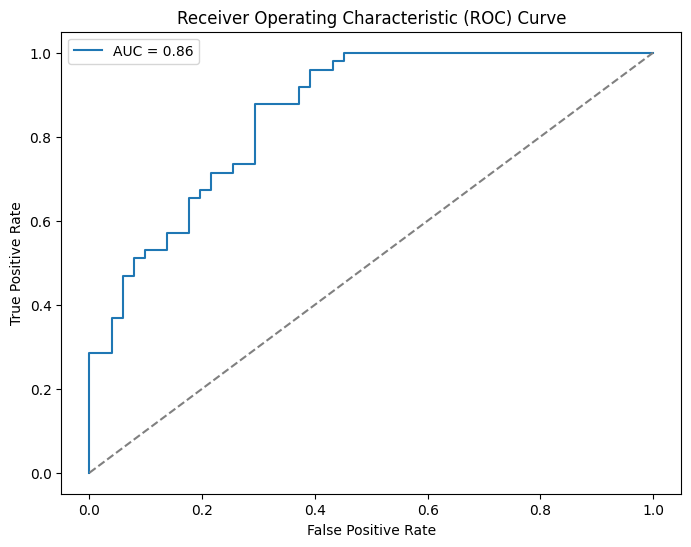

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, target_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Desicion Tree

In [ ]:
# define model Decision Tree
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# hyperparameter tuning dengan scoring recall
param_grid = {
     'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 5, 8],
    'min_samples_leaf': [2, 4, 5, 8]
}

decision_tree_classifier_gridcv = GridSearchCV(estimator=decision_tree_classifier, param_grid=param_grid, cv=5, scoring='recall')
decision_tree_classifier_gridcv.fit(feature_train, target_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [2, 4, 5, 8],
                         'min_samples_split': [2, 4, 5, 8]},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(decision_tree_classifier_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.630,57
1,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.630,57
2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.630,57
3,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.660,50
4,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.630,57
...,...,...,...
123,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.625,83
124,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.710,17
125,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.710,17
126,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.710,17


#Evaluation

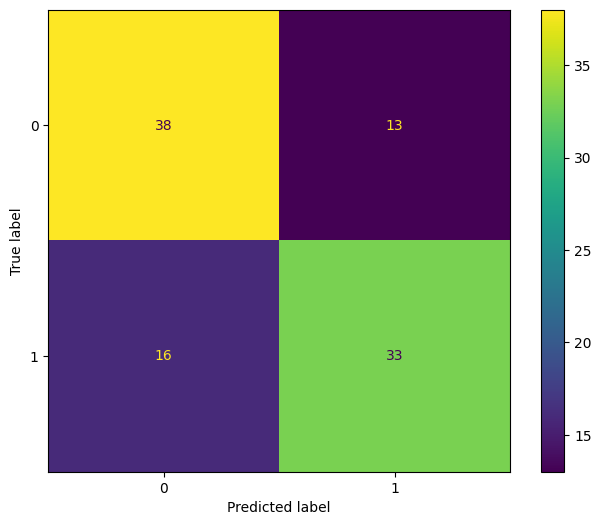

In [ ]:
# the confusion matrix

fig, ax = plt.subplots(figsize=(8,6))
target_pred = decision_tree_classifier_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=decision_tree_classifier_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=decision_tree_classifier_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Dari hasil confusion matrix dapat dijelaskan bahwa :

38 ▶ ada 38 pasien yang terprediksi tidak stroke dan benar tidak stroke.

13 ▶ ada 13 pasien yang terprediksi stroke tetapi sebenernya tidak stroke.

16 ▶ ada 16 pasien yang terprediksi tidak stroke tetapi sebenarnya stroke.

33 ▶ ada 33 pasien yang terprediksi stroke dan benar stroke.

In [ ]:
# classification report
target_pred = decision_tree_classifier_gridcv.best_estimator_.predict(feature_test)

print("Best Parameters:", decision_tree_classifier_gridcv.best_params_)
print(classification_report(target_test, target_pred))

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.70      0.75      0.72        51
           1       0.72      0.67      0.69        49

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.71      0.71      0.71       100



Dari hasil classification report diatas terlihat bahwa :

Akurasi = 71 %

Kelas "0" :

Presisi 70% artinya dari 100 pasien yang diprediksi tidak stroke, ada 70 pasien benar tidak stroke.

Recall 75% artinya dari 100 pasien yang diprediksi tidak stroke, ada 25 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

Kelas "1" :

Presisi 72% artinya dari 100 pasien yang diprediksi stroke, ada 72 pasien yang benar stroke.

Recall 67% artinya dari 100 pasien yang diprediksi stroke, ada 33 pasien yang terprediksi tidak stroke tetapi sebenarnya stroke.

Disini terlihat bahwa permodelan dapat membaca data cukup baik untuk pasien tidak stroke dan stroke.

In [ ]:
#AUC - ROC
from sklearn.metrics import roc_auc_score, roc_curve

target_probabilities =decision_tree_classifier_gridcv.best_estimator_.predict_proba(feature_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_probabilities)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.7535014005602241


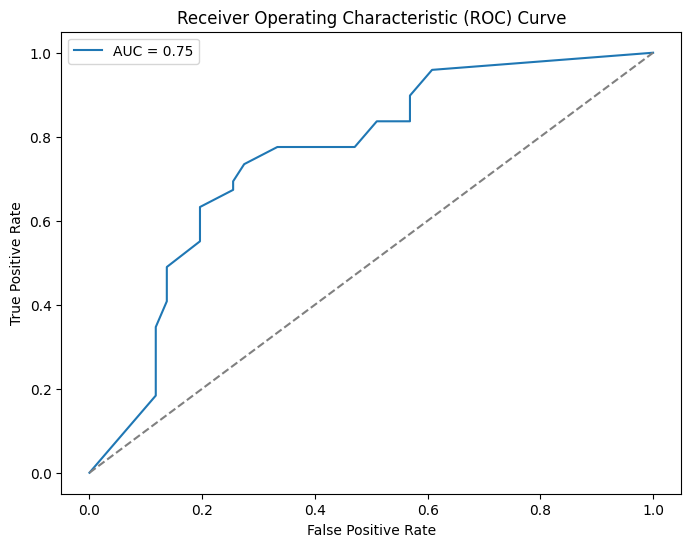

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, target_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

X = data.drop('stroke', axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Terapkan oversampling
smote = SMOTE(random_state=42)
X_train_ovt, y_train_ovt = smote.fit_resample(X_train, y_train)

# Data yang sudah di-oversample
data_oversampled = pd.concat([X_train_ovt, y_train_ovt], axis=1)
print(data_oversampled['stroke'].value_counts())

0    3888
1    3888
Name: stroke, dtype: int64


In [ ]:
#Split train dan test
feature = data_oversampled.drop('stroke', axis=1)
target = data_oversampled['stroke']
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

#KNN Classification


In [ ]:
# define KNN Classification model
knn_clf = KNeighborsClassifier()


# hyperparameter tuning dengan scoring recall
parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(feature_train, target_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.947305,7
1,{'n_neighbors': 3},0.980079,1
2,{'n_neighbors': 4},0.965618,6
3,{'n_neighbors': 5},0.979758,3
4,{'n_neighbors': 6},0.971402,5
5,{'n_neighbors': 7},0.979758,2
6,{'n_neighbors': 8},0.973652,4


#Evaluation

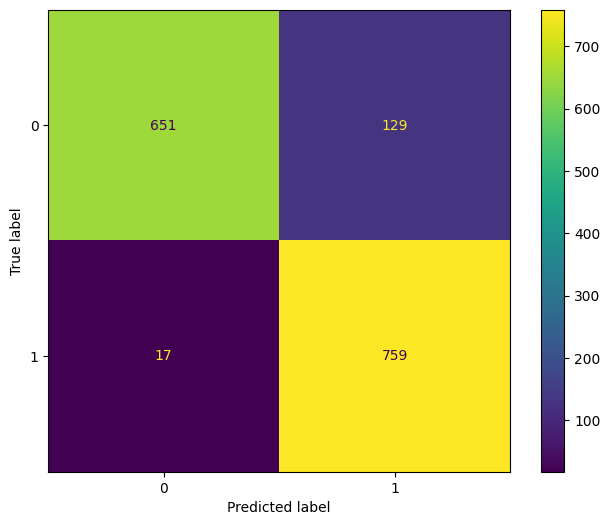

In [ ]:
# the confusion matrix

fig, ax = plt.subplots(figsize=(8,6))
target_pred = knn_clf_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Dari hasil confusion matrix dapat dijelaskan bahwa :

651 ▶ ada 651 pasien yang terprediksi tidak stroke dan benar tidak stroke.

129 ▶ ada 129 pesien yang terprediksi stroke tetapi sebenarnya tidak stroke.

17 ▶ ada 17 pasien yang terprediksi tidak stroke tetapi sebenarnya stroke.

759 ▶ ada 759 pasien yang terprediksi stroke dan benar stroke.

In [ ]:
# classification report

target_pred = knn_clf_gridcv.best_estimator_.predict(feature_test)
print("Best Parameters:", knn_clf_gridcv.best_params_)
print(classification_report(target_test, target_pred))

Best Parameters: {'n_neighbors': 3}
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       780
           1       0.85      0.98      0.91       776

    accuracy                           0.91      1556
   macro avg       0.91      0.91      0.91      1556
weighted avg       0.91      0.91      0.91      1556



Dari hasil classification report diatas terlihat bahwa :

Akurasi = 91 %

Kelas "0" :

Presisi 97% artinya dari 100 pasien yang diprediksi tidak stroke, ada 97 pasien yang benar tidak stroke.

Recall 83% artinya dari 100 pasien yang diprediksi tidak stroke, ada 17 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

Kelas "1" :

Presisi 85% artinya dari 100 pasien yang diprediksi stroke, ada 85 pasien yang benar stroke.

Recall 98% artinya dari 100 pasien yang diprediksi stroke, ada 2 pasien yang terprediksi tidak stroke tetapi sebenarnya stroke.

Disini terlihat bahwa permodelan dapat membaca data dengan baik untuk pasien tidak stroke dan stroke.

In [ ]:
#AUC - ROC
from sklearn.metrics import roc_auc_score, roc_curve

target_probabilities = knn_clf_gridcv.best_estimator_.predict_proba(feature_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_probabilities)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.9447115384615384


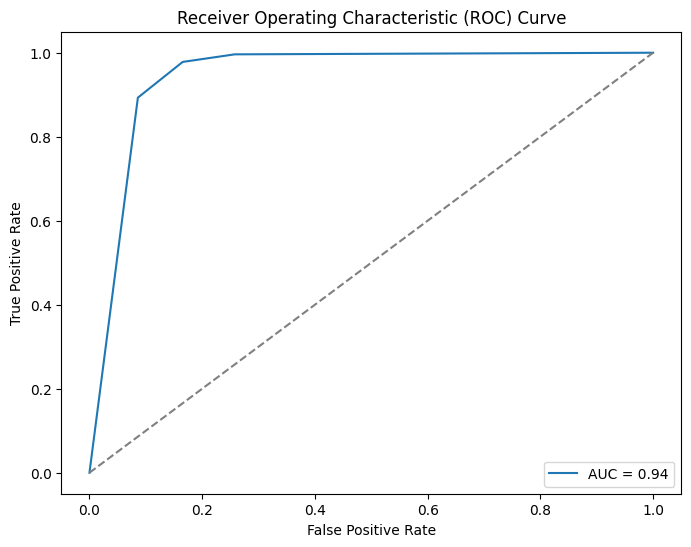

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, target_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Random Forest Classification

In [ ]:
# define random forest classifier model

rf_clf = RandomForestClassifier(random_state=42)

# hyperparameter tuning dengan scoring recall
parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(feature_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.833242,25
1,"{'max_depth': 1, 'n_estimators': 20}",0.911638,18
2,"{'max_depth': 1, 'n_estimators': 30}",0.896215,20
3,"{'max_depth': 1, 'n_estimators': 40}",0.894601,23
4,"{'max_depth': 1, 'n_estimators': 50}",0.902626,19
5,"{'max_depth': 2, 'n_estimators': 10}",0.857002,24
6,"{'max_depth': 2, 'n_estimators': 20}",0.929941,13
7,"{'max_depth': 2, 'n_estimators': 30}",0.930263,12
8,"{'max_depth': 2, 'n_estimators': 40}",0.929621,14
9,"{'max_depth': 2, 'n_estimators': 50}",0.926412,16


#Evaluation

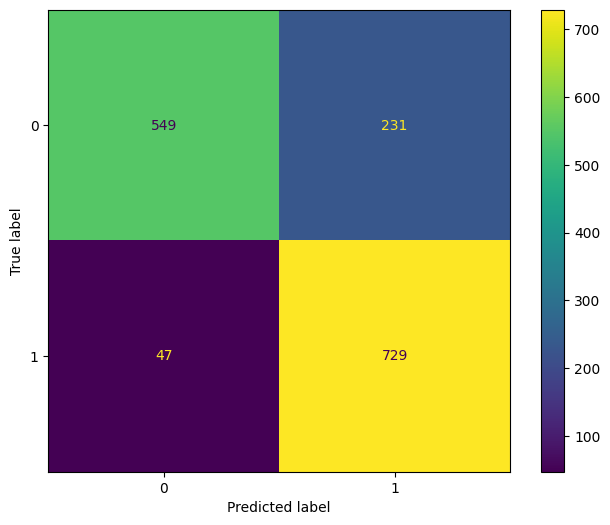

In [ ]:
# the confusion matrix

fig, ax = plt.subplots(figsize=(8,6))
target_pred = rf_clf_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Dari hasil confusion matrix dapat dijelaskan bahwa :

579 ▶ ada 579 pasien yang terprediksi tidak stroke dan benar tidak stroke.

231 ▶ ada 231 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

47 ▶ ada 47 pasien yang terprediksi tidak stroke tetapi sebenarnya stroke.

729 ▶ ada 729 pasien yang terprediksi stroke dan benar stroke.

In [ ]:
# classification report
target_pred = rf_clf_gridcv.best_estimator_.predict(feature_test)
print("Best Parameters:", rf_clf_gridcv.best_params_)
print(classification_report(target_test, target_pred))

Best Parameters: {'max_depth': 3, 'n_estimators': 40}
              precision    recall  f1-score   support

           0       0.92      0.70      0.80       780
           1       0.76      0.94      0.84       776

    accuracy                           0.82      1556
   macro avg       0.84      0.82      0.82      1556
weighted avg       0.84      0.82      0.82      1556



Dari hasil classification report diatas terlihat bahwa :

Akurasi = 82 %

Kelas "0" :

Presisi 92% artinya dari 100 pasien yang diprediksi tidak stroke, ada 92 pasien benar tidak stroke.

Recall 70% artinya dari 100 pasien yang diprediksi tidak stroke, ada 30 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

Kelas "1" :

Presisi 76% artinya dari 100 pasien yang diprediksi stroke, ada 76 pasien yang benar stroke.

Recall 94% artinya dari 100 pasien yang diprediksi stroke, ada 6 pasien yang terprediksi tidak stroke tetapi sebenarnya stroke.

Disini terlihat bahwa permodelan dapat membaca data dengan cukup baik untuk pasien tidak stroke maupun yang stroke.

In [ ]:
#AUC - ROC
from sklearn.metrics import roc_auc_score, roc_curve

target_probabilities = rf_clf_gridcv.best_estimator_.predict_proba(feature_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_probabilities)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.9193042889241343


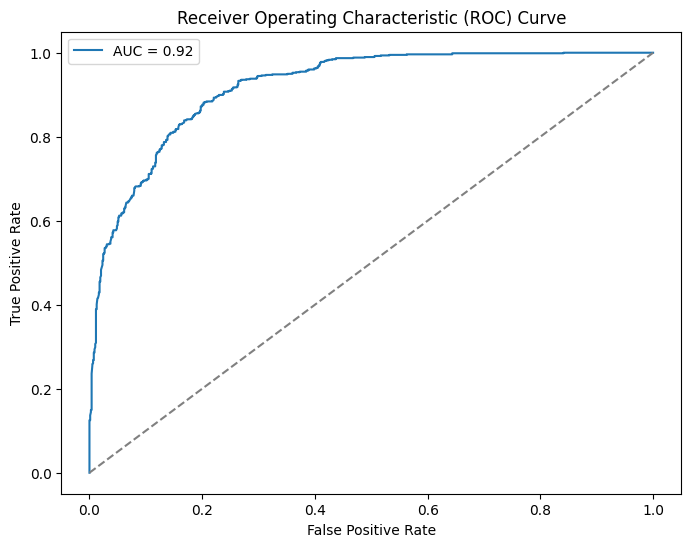

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, target_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Logistic Regression

In [ ]:
# define model Logistic Regression
logistic_classifier = LogisticRegression(max_iter=1000,random_state=42)

# hyperparameter tuning dengan scoring recall
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

logistic_classifier_gridcv = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5, scoring='recall')

logistic_classifier_gridcv.fit(feature_train, target_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(logistic_classifier_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'C': 0.001, 'penalty': 'l2'}",0.824878,5
1,"{'C': 0.01, 'penalty': 'l2'}",0.872113,1
2,"{'C': 0.1, 'penalty': 'l2'}",0.860864,2
3,"{'C': 1, 'penalty': 'l2'}",0.856044,4
4,"{'C': 10, 'penalty': 'l2'}",0.856685,3


#Evaluation

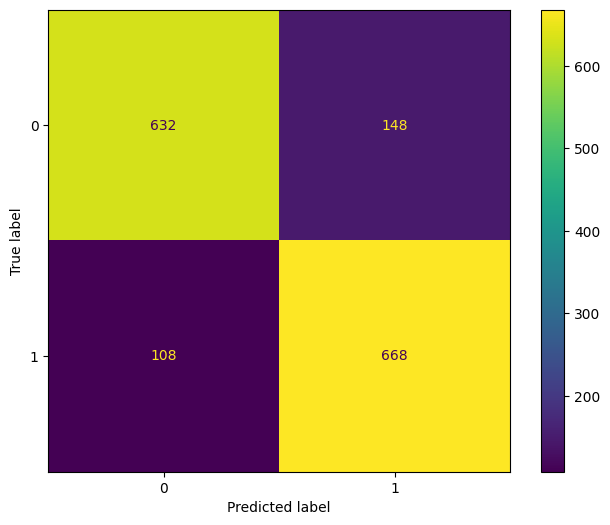

In [ ]:
# the confusion matrix

fig, ax = plt.subplots(figsize=(8,6))
target_pred = logistic_classifier_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=logistic_classifier_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=logistic_classifier_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Dari hasil confusion matrix dapat dijelaskan bahwa :

632 ▶ ada 632 pasien yang terprediksi tidak stroke dan benar tidak stroke.

148 ▶ ada 148 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

108 ▶ ada 108 pasien yang terprediksi tidak stroke tetapi sebenarnya stroke.

668 ▶ ada 668 pasien yang terprediksi stroke dan benar stroke.

In [ ]:
# classification report
target_pred = logistic_classifier_gridcv.best_estimator_.predict(feature_test)
print("Best Parameters:", logistic_classifier_gridcv.best_params_)
print(classification_report(target_test, target_pred))

Best Parameters: {'C': 0.01, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       780
           1       0.82      0.86      0.84       776

    accuracy                           0.84      1556
   macro avg       0.84      0.84      0.84      1556
weighted avg       0.84      0.84      0.84      1556



Dari hasil classification report diatas terlihat bahwa :

Akurasi = 84 %

Kelas "0" :

Presisi 85% artinya dari 100 pasien yang diprediksi tidak stroke, ada 85 pasien yang benar tidak stroke.

Recall 81% artinya dari 100% pasien yang diprediksi tidak stroke, ada 19 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

Kelas "1" :

Presisi 82% artinya dari 100 pasien yang diprediksi stroke, ada 82 pasien yang benar stroke.

Recall 86% artinya dari 100 pasien yang diprediksi stroke, ada 14 pasien yang terprediksi tidak stroke tetapi sebenarnya stroke .

Disini terlihat bahwa permodelan dapat membaca data tapingan cukup baik untuk pasien yang tidak stroke maupun yang stroke.

In [ ]:
#AUC - ROC
from sklearn.metrics import roc_auc_score, roc_curve

target_probabilities =logistic_classifier_gridcv.best_estimator_.predict_proba(feature_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_probabilities)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.921723830293418


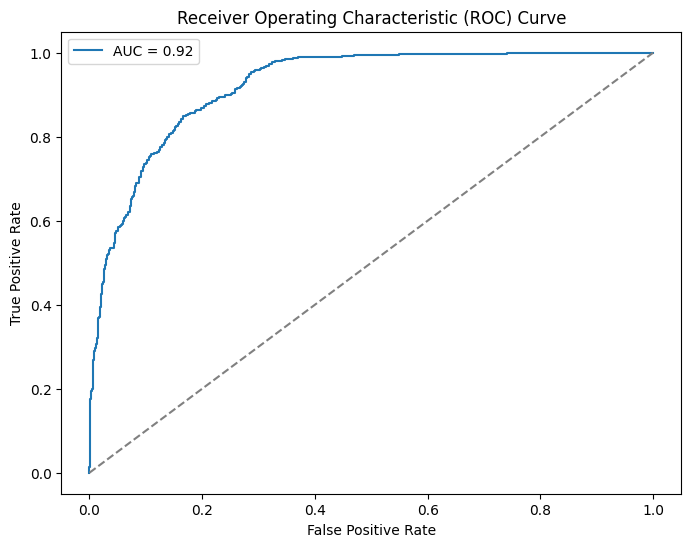

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, target_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#Desicion Tree

In [ ]:
# define model Decision Tree
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# hyperparameter tuning dengan scoring recall
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 5, 8],
    'min_samples_leaf': [2, 4, 5, 8]
}

decision_tree_classifier_gridcv = GridSearchCV(estimator=decision_tree_classifier, param_grid=param_grid, cv=5, scoring='recall')
decision_tree_classifier_gridcv.fit(feature_train, target_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [2, 4, 5, 8],
                         'min_samples_split': [2, 4, 5, 8]},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(decision_tree_classifier_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.901023,113
1,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.901023,113
2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.901672,108
3,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.905852,105
4,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.897174,117
...,...,...,...
123,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.910345,73
124,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.906168,93
125,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.906168,93
126,"{'criterion': 'entropy', 'max_depth': 30, 'min...",0.906168,93


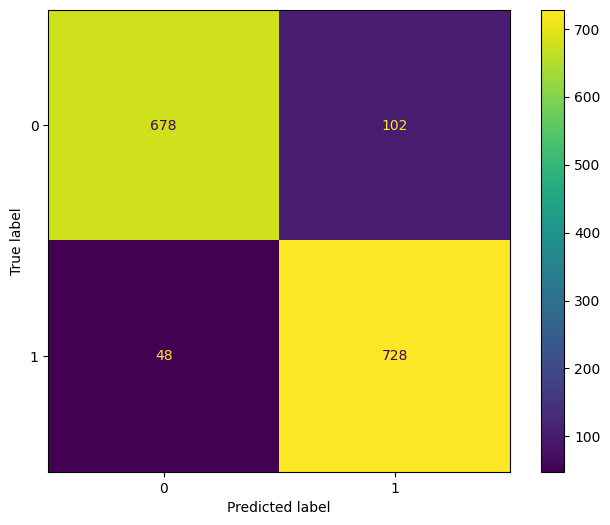

In [ ]:
# the confusion matrix
fig, ax = plt.subplots(figsize=(8,6))
target_pred = decision_tree_classifier_gridcv.best_estimator_.predict(feature_test)

cm = confusion_matrix(target_test, target_pred, labels=decision_tree_classifier_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=decision_tree_classifier_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Dari hasil confusion matrix dapat dijelaskan bahwa :

678 ▶ ada 678 pasien yang terprediksi tidak stroke dan benar tidak stroke.

102 ▶ ada 102 pasien yang terprediksi stroke tetapi sebenarnya tidak stroke.

48 ▶ ada 48 pasien yang terprediksi tidak stroke tetapi sebenarnya stroke.

728 ▶ ada 728 pasien yang terprediksi stroke dan benar stroke.

In [ ]:
# classification report gunakan model terbaik
target_pred = decision_tree_classifier_gridcv.best_estimator_.predict(feature_test)

print("Best Parameters:", decision_tree_classifier_gridcv.best_params_)
print(classification_report(target_test, target_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       780
           1       0.88      0.94      0.91       776

    accuracy                           0.90      1556
   macro avg       0.91      0.90      0.90      1556
weighted avg       0.91      0.90      0.90      1556



Dari hasil classification report diatas terlihat bahwa :

Akurasi = 90 %

Kelas "0" :

Presisi 93% artinya dari 100 pasien yang diprediksi tidak stroke, ada 93 pasien yang benar tidak stroke.

Recall 87% artinya dari 100 pasien yang diprediksi tidak stroke, ada 13 pasien yang terpredisksi  stroke tetapi sebenarnya stroke.

Kelas "1" :

Presisi 88% artinya dari 100 pasien yang diprediksi stroke, ada 88 pasien yang benar stroke.

Recall 94% artinya dari 100 pasien yang diprediksi stroke, ada 6 pasien yang  terprediksi tidak stroke tetapi sebenarnya stroke.

Disini terlihat bahwa permodelan dapat membaca data dengan baik untuk pasien tidak stroke dan stroke.

In [ ]:
#AUC - ROC
from sklearn.metrics import roc_auc_score, roc_curve

target_probabilities =decision_tree_classifier_gridcv.best_estimator_.predict_proba(feature_test)[:, 1]
roc_auc = roc_auc_score(target_test, target_probabilities)
print("AUC-ROC Score:", roc_auc)

AUC-ROC Score: 0.9387316613798573


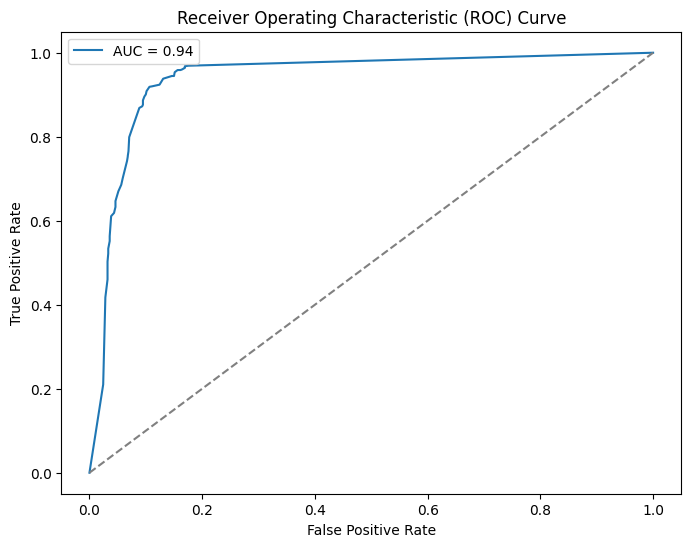

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, target_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#EVALUASI

Secara keseluruhan dari model yang sudah dijalanin. Model K-NN Classification menggunakan oversampling memiliki hasil yang sangat bagus dibanding dengan model lainnya dengan nilai akurasi sebesar 91 %, nilai presisi (kelas 1) sebesar 85% dan nilai recall (kelas 1) sebesar 98%. Artinya model ini sangat sensitif, dapat mengidentifikasi dengan baik terhadap pasien yang mengalami stroke.



#Feature yang paling berpengaruh terhadap kejadian stroke dari model K-NN Classification

In [ ]:
pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.0-py3-none-any.whl size=1042470 sha256=4c90ac94a2759b95189dcd9ec9201dd7c40fe457160058da91c44de614e9613e
  Stored in directory: /root/.cache/pip/wheels/e2/38/c1/25a95206a4873a287d776fc8e77aa7d93971acc643ecb3db38
Successfully built dalex


In [ ]:
import dalex as dx
knn_clf_gridcv__explainer = dx.Explainer(knn_clf_gridcv, feature_train, target_train, label="K-NN Classification")
knn_clf_gridcv__explainer.model_parts().plot()

Preparation of a new explainer is initiated

  -> data              : 6220 rows 15 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 6220 values
  -> model_class       : sklearn.model_selection._search.GridSearchCV (default)
  -> label             : K-NN Classification
  -> predict function  : <function yhat_proba_default at 0x7bc52ed9fb50> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.544, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.667, mean = -0.0434, max = 0.667
  -> model_info        : package sklearn

A new explainer has been created!


#Evaluasi
Dari hasi visualisasi feature importance diatas, terlihat bahwa "usia" merupakan faktor utama yang berpengaruh terhadap kejadian stroke. Selain “usia”, faktor lain yang  harus diperhatikan adalah “level gula darah” dan “berat badan” yang juga dapat berpengaruh terhadap kejadian stroke.

# Insights :

1.   Dari data menunjukkan bahwa resiko stroke pada wanita lebih tinggi dari pria.

2.   Data menunjukkan bahwa jumlah pasien yang terkena stroke cenderung meningkat seiring bertambahnya usia, dan pentingnya pencegahan pada usia lanjut.

3. Jumlah pasien yang terkena stroke cenderung lebih tinggi pada kelompok dengan rata-rata glukosa darah yang lebih tinggi.

4. Jumlah pasien stroke yang tergolong memiliki BMI diatas normal (lebih tinggi) merupakan faktor resiko stroke. Resiko stroke menurun dengan berat badan normal.

# Rekomendasi :

1. Lakukan pemeriksaan kesehatan secara rutin dan konsultasi dengan dokter mengenai faktor dan langkah-langkah pencegaran stroke yang sesuai.

2. Untuk yang sudah menginjak usia 50 tahun sebaiknya melakukan pola hidup sehat seperti diet seimbang, rutin berolahraga dan menghindari stress yang berlebihan.

3. Memantau kadar gula darah secara teratur, terutama bagi mereka yang memiliki riwayat diabetes, mengikuti diet sehat yang rendah gula dan karbohidrat, serta membatasi asumsi makanan olahan dan makan tinggi gula.

4. Melakukan penurunan berat badan yang sehat tentunya dengan arahan dokter atau ahli gizi.






